### ENTRENAR MODELO DE REGRESIÓN LOGÍSTICA MULTINOMINAL

- Crear un modelo de regresión logística multinomial, que permita clasificar vehículos con datos sintéticos.
- Caraterísticas: ruedas (2, 4, 6, 8), capacidad_pasajeros ( 1, 2, 4, 5, 6), carga_máxima (50, 200, 500, 2000, y 5000)
- Etiquetas: Moto (2 ruedas y carga 50), Camión (6 u 8 ruedas y carga de 2000 o 5000), y Coche (4 o 5 ruedas y carga de 200 a 500)
- 300 ejemplos

In [41]:
# Cargamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib as plt

In [42]:
# Generar datos sintéticos para clasificación de especies de animales
# Etiquetas: 0 Moto, 1 Camión, 2 Coche
# Características: 0 Pelo, 1 Plumas, 2 Temperatura

np.random.seed(42)
n_samples = 300

# Características de los animales
ruedas = np.random.choice([2, 4, 6, 8], n_samples)
capacidad_pasajeros = np.random.choice([1, 2, 3, 4, 5, 6], n_samples)
carga_maxima = np.random.choice([50, 200, 500, 2000, 5000], n_samples)

# Etiquetas de los vehiculos
y = np.where((ruedas == 2) & (carga_maxima == 50), 0,
    np.where(((ruedas == 6) | (ruedas == 8)) & (2000 <= carga_maxima) & (carga_maxima <= 5000), 1,
    np.where(((ruedas == 4) | (ruedas == 5)) & (200 <= carga_maxima) & (carga_maxima <= 500), 2, 3)))

# Creamos el DataFrame con los datos sintéticos generados
df = pd.DataFrame({
    'ruedas' : ruedas,
    'capacidad_pasajeros' : capacidad_pasajeros,
    'carga_maxima' : carga_maxima,
    'Tipo' : y
})

print(df.info())
print(df[df["Tipo"] == 1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ruedas               300 non-null    int64
 1   capacidad_pasajeros  300 non-null    int64
 2   carga_maxima         300 non-null    int64
 3   Tipo                 300 non-null    int64
dtypes: int64(4)
memory usage: 9.5 KB
None
     ruedas  capacidad_pasajeros  carga_maxima  Tipo
1         8                    1          2000     1
5         8                    5          2000     1
8         6                    6          5000     1
11        6                    3          5000     1
12        6                    1          2000     1
..      ...                  ...           ...   ...
259       6                    3          2000     1
272       8                    5          2000     1
273       8                    4          5000     1
297       6                    2   

              precision    recall  f1-score   support

        Moto       0.00      0.00      0.00         9
      Camión       1.00      0.88      0.93        16
       Coche       0.00      0.00      0.00        11
 Desconocido       0.71      1.00      0.83        54

    accuracy                           0.76        90
   macro avg       0.43      0.47      0.44        90
weighted avg       0.60      0.76      0.66        90



c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet

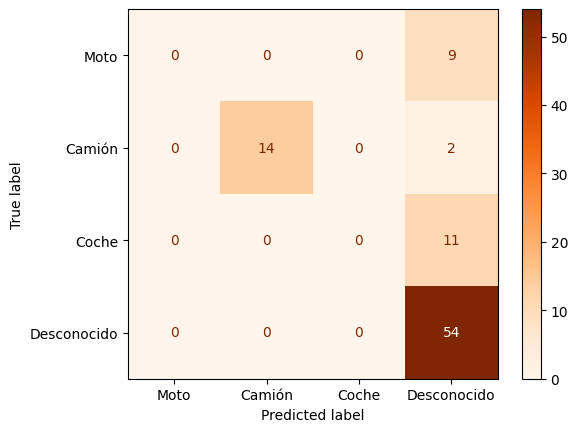

In [43]:
# Definimos las variables predictoras y la variable objetivo
X = df.drop(columns=["Tipo"])
y = df["Tipo"]

# Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos el modelo de regresión logística multinominal
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500) # El parámetro " multi_class='mulnominal' " es el que determina que este modelo de RL sea multinominal

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos las predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de la clasificación
print(classification_report(y_test, y_pred, target_names=["Moto", "Camión", "Coche", "Desconocido"]))

# Creamos la matriz de confusión y la mostramos
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Moto", "Camión", "Coche", "Desconocido"], cmap= plt.colormaps.get_cmap("Oranges"))